In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc


In [33]:
def create_model(learning_rate=0.001):
    model = models.Sequential()

    # First Conv Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Conv Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Conv Layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add a fully connected layer
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))

    # Output layer (binary classification: Cat -> -1, Dog -> 1)
    model.add(layers.Dense(1, activation='tanh'))  # tanh will output values between -1 and 1

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error', metrics=['accuracy'])

    return model


In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Flatten the label arrays
y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

# Convert labels to binary for Cat-Dog classification (assuming 'Cat' = 3, 'Dog' = 5)
cat_class = 3  # Class index for Cat
dog_class = 5  # Class index for Dog

# Filter training data to only include 'Cat' and 'Dog' classes
mask_train = np.isin(y_train_full, [cat_class, dog_class])
x_train = x_train_full[mask_train]
y_train = y_train_full[mask_train]

# Convert labels to -1 and 1 for binary classification
y_train = np.where(y_train == cat_class, -1, 1)

# Normalize the pixel values to [0, 1]
x_train = x_train / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize test set (if needed)
x_test = x_test / 255.0
y_test = np.where(y_test == cat_class, -1, 1)


ModuleNotFoundError: No module named 'tensorflow'

In [35]:
from sklearn.base import BaseEstimator

# Custom class to wrap the Keras model for scikit-learn compatibility
class KerasModel(BaseEstimator):
    def __init__(self, learning_rate=0.001, epochs=10, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = create_model(self.learning_rate)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        loss, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Define hyperparameter grid to search over
param_dist = {
    'learning_rate': [0.0001, 0.001, 0.01],
    'epochs': [10],
    'batch_size': [32, 64],
}

# Create the model wrapper
model = KerasModel()

# Perform the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=5, cv=3, verbose=1)

# Fit the search on the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.0000e+00 - loss: 1.9636
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.0000e+00 - loss: 2.0042
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.0000e+00 - loss: 1.9959
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.0000e+00 - loss: 2.0157
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.0000e+00 - loss: 2.0198
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.0000e+00 - loss: 2.0201
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.0000e+00 - loss: 2.0049
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0000e+00 - loss: 1.9555
Epoch 9/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.0000e+00 - loss: 1.9902
Epoch 10/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.0000e+00 - loss: 1.9779
Epoch 1/10
167/167 ━━━━━━

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 6.7740e-04 - loss: 0.9909
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.0679 - loss: 0.8795
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.1614 - loss: 0.7702
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.2042 - loss: 0.7010
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.2299 - loss: 0.6318
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.2774 - loss: 0.5559
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.3102 - loss: 0.4673
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.3146 - loss: 0.4210
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.3554 - loss: 0.3754
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.3879 - loss: 0.2956
Test accuracy of the best model: 36.45%
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Test accuracy: 74.70%


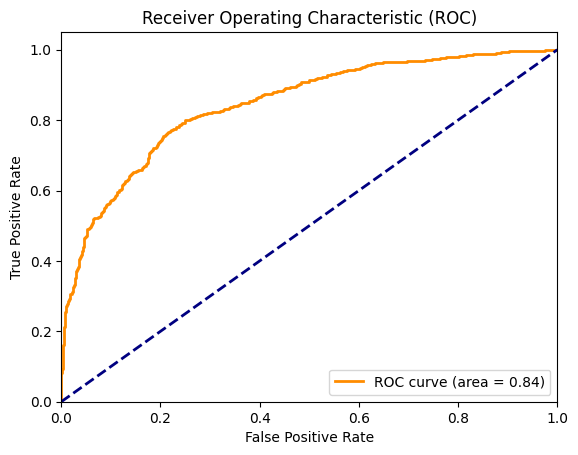

In [36]:
# Extract best parameters from RandomizedSearchCV
best_params = random_search.best_params_

# Create the best model
best_model = KerasModel(learning_rate=best_params['learning_rate'],
                        epochs=best_params['epochs'],
                        batch_size=best_params['batch_size'])

# Retrain the best model using the full training set
best_model.fit(x_train, y_train)

# Evaluate the best model on the test set
test_acc = best_model.score(x_test, y_test)
print(f"Test accuracy of the best model: {test_acc * 100:.2f}%")
# Predict probabilities on the test set
y_pred = best_model.predict(x_test)

# Convert predictions to binary values (-1 or 1) based on the output activation
y_pred_binary = np.where(y_pred >= 0, 1, -1)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Compute AUROC (Area Under the Receiver Operating Characteristic Curve)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)



# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [41]:
print(f"AUROC: {roc_auc}")

AUROC: 0.844878


In [37]:
from sklearn.metrics import confusion_matrix

def calculate_per_class_accuracy(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Accuracy for Cat (-1)
    cat_accuracy = tn / (tn + fp)  # True Negatives for Cat divided by all predicted Cat (TN + FP)

    # Accuracy for Dog (1)
    dog_accuracy = tp / (tp + fn)  # True Positives for Dog divided by all predicted Dog (TP + FN)

    print(f"Accuracy for Cat (Class -1): {cat_accuracy * 100:.2f}%")
    print(f"Accuracy for Dog (Class 1): {dog_accuracy * 100:.2f}%")

# After training and prediction
y_pred_binary = np.where(y_pred >= 0, 1, -1)  # Binarize predictions
calculate_per_class_accuracy(y_test, y_pred_binary)


Accuracy for Cat (Class -1): 66.10%
Accuracy for Dog (Class 1): 83.30%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.0000e+00 - loss: 1.0003
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.0000e+00 - loss: 0.9785
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.0013 - loss: 0.9533
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.0125 - loss: 0.9106
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.0296 - loss: 0.8911
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.0567 - loss: 0.8519
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.0774 - loss: 0.8149
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.0925 - loss: 0.8064
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.0930 - loss: 0.7805
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.1247 - loss: 0.7512
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.0039 - loss: 0.9772
Epoch 2/10
125/125 ━━━━

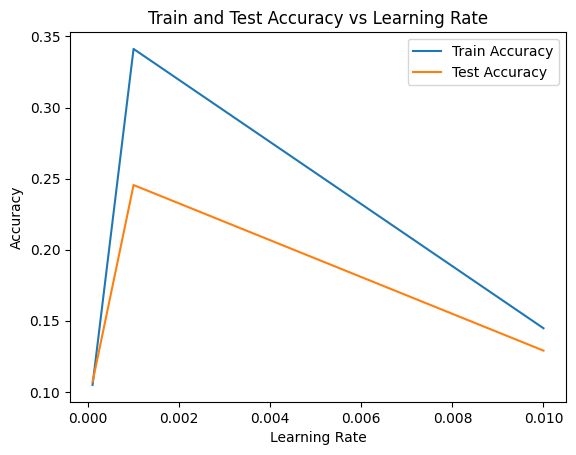

In [38]:
import matplotlib.pyplot as plt

# Store training and test accuracies for different learning rates
learning_rates = [0.0001, 0.001, 0.01]
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
    # Build and train the model with each learning rate
    model = KerasModel(learning_rate=lr, epochs=10, batch_size=64)
    model.fit(x_train, y_train)

    # Calculate training accuracy
    train_accuracy = model.score(x_train, y_train)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    test_accuracy = model.score(x_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot learning rate vs accuracy
plt.plot(learning_rates, train_accuracies, label='Train Accuracy')
plt.plot(learning_rates, test_accuracies, label='Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Learning Rate')
plt.legend()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 1.8357e-04 - loss: 1.0002
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.0028 - loss: 0.9766
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.0026 - loss: 0.9864
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 6.4934e-04 - loss: 0.9887
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.0065 - loss: 0.9768
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.0016 - loss: 0.9967
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 3.7537e-04 - loss: 0.9961
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.0176 - loss: 1.0085
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.0028 - loss: 0.9908
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 1.2403e-04 - loss: 0.9979


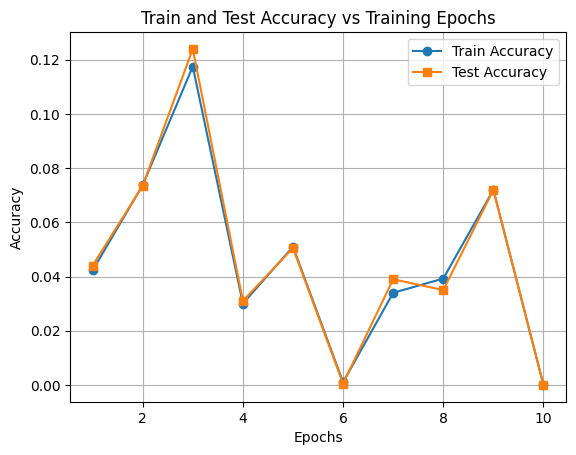

In [40]:
# Store training and test accuracies for each epoch
epochs = 10  # Number of epochs defined in the hyperparameter search
train_accuracies_per_epoch = []
test_accuracies_per_epoch = []

# Initialize the model with the best parameters found by RandomizedSearchCV
best_model = KerasModel(learning_rate=best_params['learning_rate'],
                        epochs=1,  # We'll train incrementally epoch by epoch
                        batch_size=best_params['batch_size'])

# Train the model incrementally to track accuracy per epoch
for epoch in range(1, epochs + 1):
    # Train for one epoch
    best_model.epochs = 1
    best_model.fit(x_train, y_train)

    # Calculate and store training accuracy
    train_accuracy = best_model.score(x_train, y_train)
    train_accuracies_per_epoch.append(train_accuracy)

    # Calculate and store test accuracy
    test_accuracy = best_model.score(x_test, y_test)
    test_accuracies_per_epoch.append(test_accuracy)

# Plot training and test accuracy vs epochs
plt.plot(range(1, epochs + 1), train_accuracies_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_accuracies_per_epoch, label='Test Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Training Epochs')
plt.legend()
plt.grid()
plt.show()
